In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/dataset/credit_card_fraud_detection.zip

Archive:  /content/drive/MyDrive/dataset/credit_card_fraud_detection.zip
replace application_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/application_data.csv")

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df.columns)

122

In [ ]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### Drop Values

In [ ]:
#estos son los valores que eliminare por que solo quiero trabajar con unatase de 28 columnas que creo que son las mas importantes
df_clean = df.copy()
df_clean = df_clean[df_clean.columns[1:29]]
print(df_clean.shape)
df_clean.head()

(307511, 28)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff


In [ ]:
df_clean = df_clean.drop(columns =["FLAG_OWN_REALTY", "NAME_TYPE_SUITE","REGION_POPULATION_RELATIVE","FLAG_MOBIL","FLAG_EMP_PHONE", "FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE", "FLAG_EMAIL", "OWN_CAR_AGE"],axis = 1)
df_clean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE
0,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers
3,0,Cash loans,F,N,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers
4,0,Cash loans,M,N,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff


Tenemos que obtener el numero de valores nulos para ver que hacemos con ellos

In [ ]:
#esta es la suma de valores nulos
df_clean.isnull().sum()

TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
OCCUPATION_TYPE        96391
dtype: int64

In [ ]:
#esta es la lista de tipos de dato que tienen las columnas
df_clean.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
DAYS_REGISTRATION      float64
DAYS_ID_PUBLISH          int64
OCCUPATION_TYPE         object
dtype: object

In [ ]:
#todas las columnas que tienen valores nulos los llenaremos con nan values.
df_clean['OCCUPATION_TYPE'].fillna("No ocupation", inplace = True)

In [ ]:
# los demas precios los llenaremos de el promdeio de las columnas 
mean_annuity= df_clean.AMT_ANNUITY.mean()
mean_goods= df_clean.AMT_GOODS_PRICE.mean()
df_clean.AMT_ANNUITY.fillna(mean_annuity, inplace=True)
df_clean.AMT_GOODS_PRICE.fillna(mean_goods, inplace = True)

### Ahora convertiremos las variables de tiempo

Trabajaremos con las columans DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION Y DAYS_ID_PUBLISH, lo que heremos sera dividir entre 365 dias para obtener el numero de años 

In [ ]:
df_clean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE
0,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers
3,0,Cash loans,F,N,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers
4,0,Cash loans,M,N,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff


In [ ]:
df_clean["YEARS_BIRTH"] = abs(df_clean.DAYS_BIRTH/365).astype(int)
df_clean["YEAR_EMPLOYED"] = abs(df_clean.DAYS_EMPLOYED/365).astype(int)
df_clean["YEARS_REGISTRATION"] = abs(df_clean.DAYS_REGISTRATION/365).astype(int)
df_clean["YEARS_ID_PUBLISH"] = abs(df_clean.DAYS_ID_PUBLISH/365).astype(int)

df_clean.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"], axis=1, inplace=True)

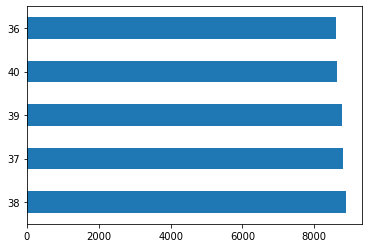

In [ ]:
#el top 5 de edades de personas que piden prestamos entantre los 36 a 40
df_clean["YEARS_BIRTH"].value_counts()[:5].plot(kind = "barh")

### EDA

una vez que tenemos todos los datos acomodados hacemos un analisis exploratorio de los datos

In [ ]:
comenzamos a ver el tamaño de etiquetas que tenemos por cada caso

In [ ]:
df_clean.TARGET.value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

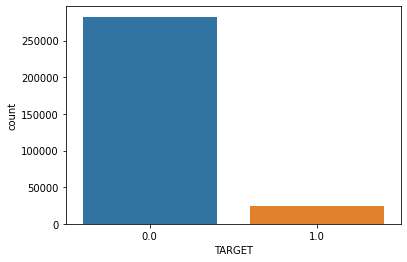

In [ ]:
#vemos que el dataset esta muy desvalanceado tenemos demasiados prtesamos que no fueron acepatdos que estan representados con un 0
# y muy pocos con creditos aceptados 
import seaborn as sns

ax = sns.countplot(x ="TARGET", data=df_clean)

Aqui nos damos cuenta que el genero que mas pide prestamos es femenino 

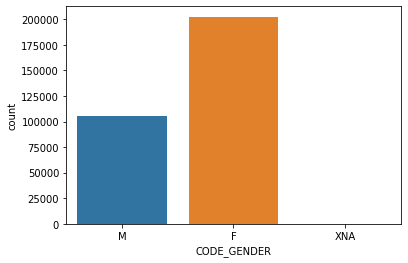

In [ ]:
import seaborn as sns

ax = sns.countplot(x ="CODE_GENDER", data=df_clean)

In [ ]:
#aqui cambiamos de XNA  a other type of gender, 
df_clean.CODE_GENDER.replace("XNA", "other", inplace=True)

Ahora checaremos la tabla de numero de niños

In [ ]:
# de las cosas que mas me llama la atencion es el numero de niños que hay, aqui vemos un claro ejemplo de  outliers
df_clean.CNT_CHILDREN.value_counts().sort_values(ascending=False)

0.0     215371
1.0      61119
2.0      26749
3.0       3717
4.0        429
5.0         84
6.0         21
7.0          7
14.0         3
9.0          2
19.0         2
8.0          2
10.0         2
12.0         2
11.0         1
Name: CNT_CHILDREN, dtype: int64

In [ ]:
#Aqui vemos que las personas que se equivocaron son 
gk = df_clean.groupby(["CODE_GENDER", "CNT_CHILDREN"])
#gk.first()

Text(0, 0.5, 'CNT_CHILDRE')

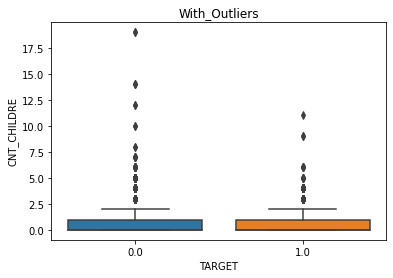

In [ ]:
#como vemos hay una granc cantidas de outlier
sns.boxplot(y=df_clean["CNT_CHILDREN"],data=df_clean,x=df_clean['TARGET'])
plt.title("Outliers")
plt.ylabel("numero de hinos")

Text(0, 0.5, 'Numero de hijos')

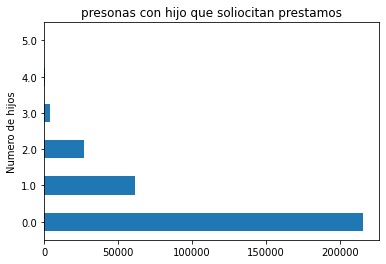

In [ ]:
# la mayoria de personas que piden prestamos no tienen hijos 
df_clean.CNT_CHILDREN.value_counts()[:5].plot(kind= "barh", title = "numero de hijos por persona", )
plt.title("presonas con hijo que soliocitan prestamos")
plt.ylabel("Numero de hijos")

Lo que haremos será quitar estos outliers y agregalos al dataset, dejaremos un maximo de 8 

In [ ]:
df_clean = df_clean[df_clean.CNT_CHILDREN < 8]
df_clean.shape

(307497, 18)

In [ ]:
df_clean.CNT_CHILDREN.value_counts()

0.0    215371
1.0     61119
2.0     26749
3.0      3717
4.0       429
5.0        84
6.0        21
7.0         7
Name: CNT_CHILDREN, dtype: int64

Despues visualizamos de donde proviene el mayor ingreso de las personas

In [ ]:
df_clean["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

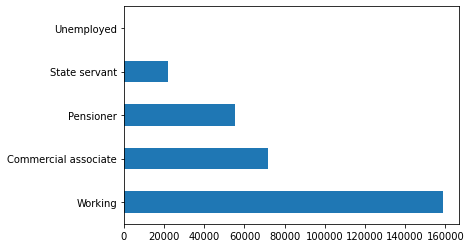

In [ ]:
#ploteamos el top 5 ingresos de donde provienen los que piden prestamos, la mayoria son trabajadores, asociaciones comerciales y pensionados en el numero 3
#tiene sentido pero hay 22 que tiene prestamos y no tienen empleo en este momento
df_clean["NAME_INCOME_TYPE"].value_counts()[:5].plot(kind = "barh")

Ahora veremos el estatus de las personas, quienes seran las que piden mas prestamos

Esto esta muy interesante las personas que mas prestamos piden son las personas de secundaria 

In [ ]:
df_clean["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

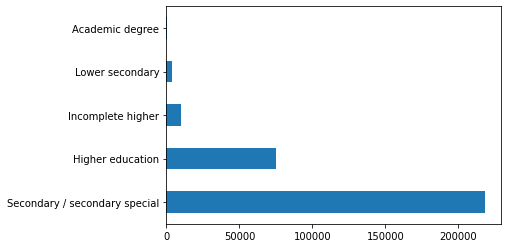

In [ ]:
df_clean["NAME_EDUCATION_TYPE"].value_counts()[:5].plot(kind = "barh")

las personas que estan casadas piden mas prestamos

In [ ]:
df_clean["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

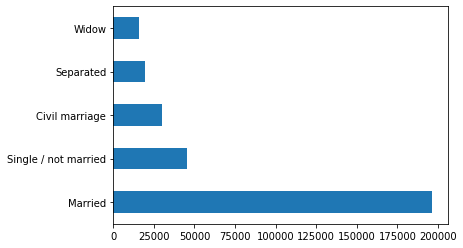

In [ ]:
df_clean["NAME_FAMILY_STATUS"].value_counts()[:5].plot(kind = "barh")

la mayoria de los que piden prestamos son dueños de casas

In [ ]:
df_clean["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

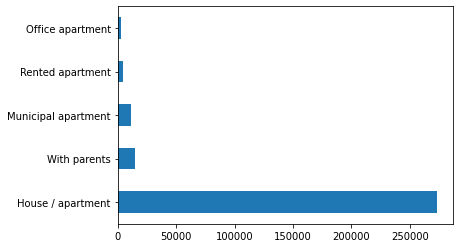

In [ ]:
df_clean["NAME_HOUSING_TYPE"].value_counts()[:5].plot(kind = "barh")

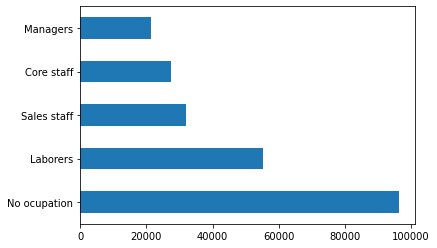

In [ ]:
df_clean["OCCUPATION_TYPE"].value_counts()[:5].plot(kind = "barh")

Graficaremos las edades de todos 

In [ ]:
df_clean.YEARS_BIRTH.value_counts().sort_values(ascending = False)

In [ ]:
years = df_clean["YEARS_BIRTH"].astype("int")

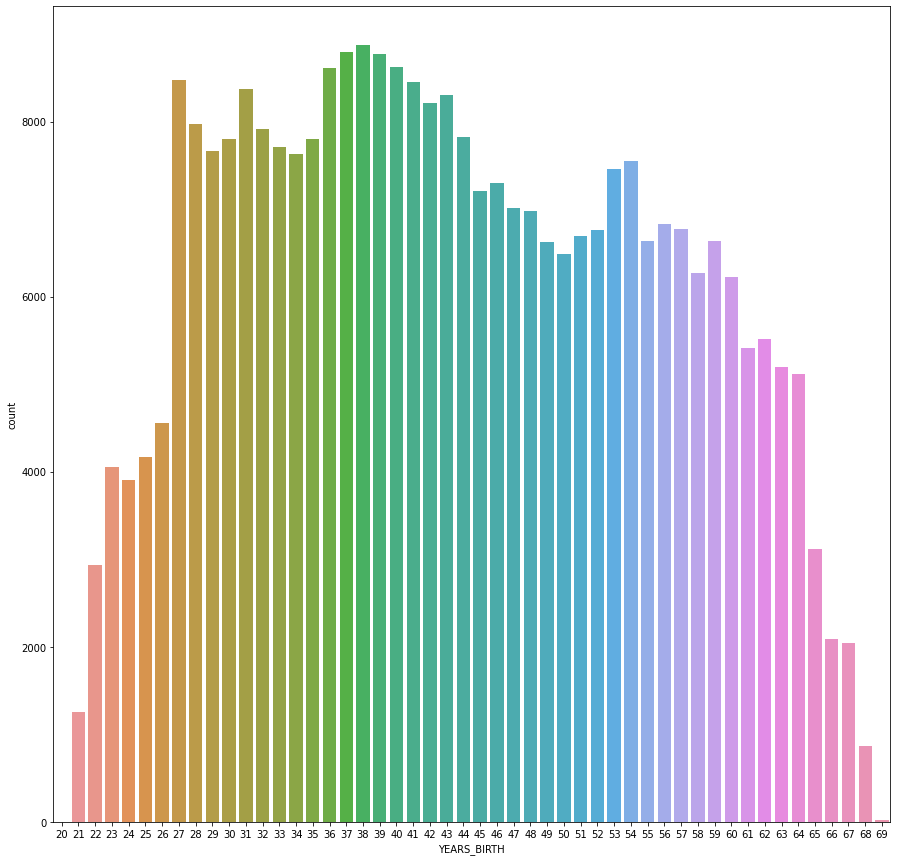

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,15)
ax = sns.countplot(x =years, data=df_clean)

### viendo a fondo las correlaciones

In [ ]:
#primero vemos los timpo de datos que tenemos
df_clean.dtypes

TARGET                 float32
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
CNT_CHILDREN           float32
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
OCCUPATION_TYPE         object
YEARS_BIRTH            float32
YEAR_EMPLOYED          float32
YEARS_REGISTRATION     float32
YEARS_ID_PUBLISH       float32
dtype: object

In [ ]:
df_clean["YEARS_BIRTH"] = df_clean["YEARS_BIRTH"].astype("float32")
df_clean["YEAR_EMPLOYED"] = df_clean["YEAR_EMPLOYED"].astype("float32")
df_clean["YEARS_REGISTRATION"] = df_clean["YEARS_REGISTRATION"].astype("float32")
df_clean["YEARS_ID_PUBLISH"] = df_clean["YEARS_ID_PUBLISH"].astype("float32")
df_clean["TARGET"] = df_clean["TARGET"].astype("float32")
df_clean["CNT_CHILDREN"] = df_clean["CNT_CHILDREN"].astype("float32")

In [ ]:
df_clean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,YEARS_BIRTH,YEAR_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,1.0,Cash loans,M,N,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,25.0,1.0,9.0,5.0
1,0.0,Cash loans,F,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,45.0,3.0,3.0,0.0
2,0.0,Revolving loans,M,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,52.0,0.0,11.0,6.0
3,0.0,Cash loans,F,N,0.0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,52.0,8.0,26.0,6.0
4,0.0,Cash loans,M,N,0.0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,54.0,8.0,11.0,9.0


Correlacion entre varliables

In [ ]:
# aqui vemos los coeficientes de correlacion
#que nos indican que tanto estan relacionados una variable con respecto a la otra
corr = df_clean.corr()
corr.style.background_gradient(cmap='Blues')

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEAR_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
TARGET,1.000000,0.019071,-0.003996,-0.030385,-0.012828,-0.039641,-0.078231,-0.047035,-0.041957,-0.051126
CNT_CHILDREN,0.019071,1.000000,0.013010,0.002329,0.021617,-0.001661,-0.332736,-0.242972,-0.184560,0.028297
AMT_INCOME_TOTAL,-0.003996,0.013010,1.000000,0.156866,0.191650,0.159596,-0.027228,-0.063834,-0.027777,-0.008646
AMT_CREDIT,-0.030385,0.002329,0.156866,1.000000,0.770125,0.986588,0.055389,-0.064330,-0.009531,0.006836
AMT_ANNUITY,-0.012828,0.021617,0.191650,0.770125,1.000000,0.774661,-0.009471,-0.102860,-0.038377,-0.011099
AMT_GOODS_PRICE,-0.039641,-0.001661,0.159596,0.986588,0.774661,1.000000,0.053370,-0.062262,-0.011484,0.009547
YEARS_BIRTH,-0.078231,-0.332736,-0.027228,0.055389,-0.009471,0.053370,1.000000,0.623878,0.331695,0.271461
YEAR_EMPLOYED,-0.047035,-0.242972,-0.063834,-0.064330,-0.102860,-0.062262,0.623878,1.000000,0.214576,0.274465
YEARS_REGISTRATION,-0.041957,-0.184560,-0.027777,-0.009531,-0.038377,-0.011484,0.331695,0.214576,1.000000,0.101377
YEARS_ID_PUBLISH,-0.051126,0.028297,-0.008646,0.006836,-0.011099,0.009547,0.271461,0.274465,0.101377,1.000000


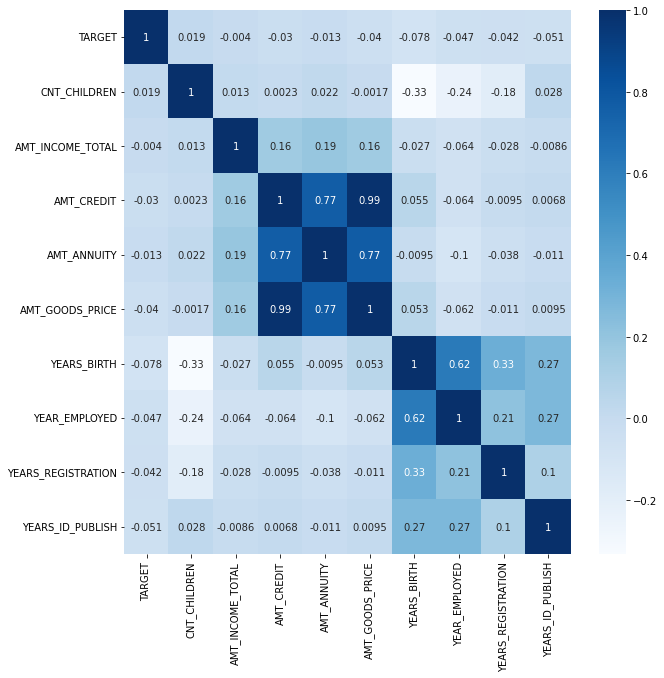

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 10))
sns.heatmap(df_clean.corr(),annot= True, cmap = "Blues")

In [ ]:
#sns.pairplot(df_clean, hue="CODE_GENDER")

In [ ]:
# summarize
print('data1: mean=%.3f stdv=%.3f' %  (np.mean(df_clean["AMT_CREDIT"]), np.std(df_clean["AMT_CREDIT"])))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(df_clean["AMT_GOODS_PRICE"]), np.std(df_clean["AMT_GOODS_PRICE"])))

data1: mean=599026.000 stdv=402490.123
data2: mean=538396.207 stdv=369278.826


In [ ]:
#si la correlacion esta arriba de 0.05 es que tiene una realacion 
from scipy import stats 
pearson_correlation, _ = stats.pearsonr(df_clean["AMT_CREDIT"], df_clean["AMT_GOODS_PRICE"])
print("pearson correlation: ",  pearson_correlation)

pearson correlation:  0.9865880998787894


Text(0.5, 1.0, 'correlation between amount of credit and amount of price')

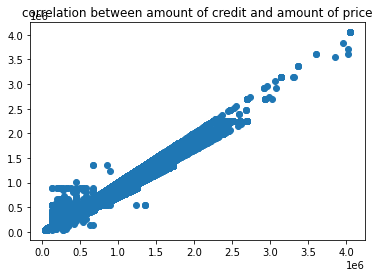

In [ ]:
plt.scatter(df_clean["AMT_CREDIT"], df_clean["AMT_GOODS_PRICE"])
plt.title("correlation between amount of credit and amount of price")